In [1]:
import imgaug as ia
from imgaug import augmenters as iaa
%matplotlib inline
ia.seed(1)
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
train_full = pd.read_csv('training_set.csv')

In [4]:
len(train_full)

24000

In [5]:
import cv2

In [6]:
rotation_array = [90,180,270]

In [7]:
import numpy as np

In [8]:
np.random.choice(rotation_array)

270

In [9]:
import os

In [10]:
os.mkdir('train_new_aug_crop_rot_gauss')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'train_new_aug_crop_rot_gauss'

In [11]:
train_aug_new_crop_rot_gauss = pd.DataFrame(columns=['image_name','x1','y1','x2','y2'])

In [12]:
from tqdm import tqdm

In [13]:
np.random.seed(111)

In [14]:
count = 0
for i in tqdm(train_full.iterrows()):
    image = plt.imread('train/' + i[1]['image_name'])
    bbs = ia.BoundingBoxesOnImage([ia.BoundingBox(x1 = i[1]['x1'],x2 = i[1]['x2'],y1 = i[1]['y1'], y2 = i[1]['y2'])],shape = image.shape)
    ang = np.random.choice(rotation_array)
    rot = iaa.Affine(rotate=ang)
    image_aug = rot.augment_image(image)
    bbs_aug = rot.augment_bounding_boxes([bbs])[0]
    final_coords = bbs_aug.bounding_boxes[0].get_coords
    if(final_coords[0] < 0):
        final_coords[0] = 0
    if(final_coords[1] < 0):
        final_coords[1] = 0
    if(final_coords[2] > 640):
        final_coords[2] = 640
    if(final_coords[3] > 480):
        final_coords[3] = 480
    train_aug_new_crop_rot_gauss = train_aug_new_crop_rot_gauss.append({'image_name':'aug_new_rot_{}'.format(i[1]['image_name']),'x1':final_coords[0],'y1':final_coords[1],'x2':final_coords[2],'y2':final_coords[3]}, ignore_index=True)
    plt.imsave('train_new_aug_crop_rot_gauss/' + 'aug_new_rot_{}'.format(i[1]['image_name']), image_aug)
    a = np.random.randint(15,100)
    b = np.random.randint(15,100)
    c = np.random.randint(15,100)
    d = np.random.randint(15,100)
    crop = iaa.Crop(px= (a,b,c,d))
    image_aug = crop.augment_image(image)
    bbs_aug = crop.augment_bounding_boxes([bbs])[0]
    final_coords = bbs_aug.bounding_boxes[0].get_coords
    if(final_coords[0] < 0):
        final_coords[0] = 0
    if(final_coords[1] < 0):
        final_coords[1] = 0
    if(final_coords[2] > 640):
        final_coords[2] = 640
    if(final_coords[3] > 480):
        final_coords[3] = 480
    train_aug_new_crop_rot_gauss = train_aug_new_crop_rot_gauss.append({'image_name':'aug_new_crop_{}'.format(i[1]['image_name']),'x1':final_coords[0],'y1':final_coords[1],'x2':final_coords[2],'y2':final_coords[3]}, ignore_index=True)
    plt.imsave('train_new_aug_crop_rot_gauss/' + 'aug_new_crop_{}'.format(i[1]['image_name']), image_aug)
    gauss = iaa.Dropout(p=0.09)
    image_aug = gauss.augment_image(image)
    bbs_aug = gauss.augment_bounding_boxes([bbs])[0]
    final_coords = bbs_aug.bounding_boxes[0].get_coords
    if(final_coords[0] < 0):
        final_coords[0] = 0
    if(final_coords[1] < 0):
        final_coords[1] = 0
    if(final_coords[2] > 640):
        final_coords[2] = 640
    if(final_coords[3] > 480):
        final_coords[3] = 480
    train_aug_new_crop_rot_gauss = train_aug_new_crop_rot_gauss.append({'image_name':'aug_new_gauss_{}'.format(i[1]['image_name']),'x1':final_coords[0],'y1':final_coords[1],'x2':final_coords[2],'y2':final_coords[3]}, ignore_index=True)
    plt.imsave('train_new_aug_crop_rot_gauss/' + 'aug_new_gauss_{}'.format(i[1]['image_name']), image_aug)
    count = count + 1
    k = np.array(count)
    np.save('count.npy',k)
    
    
    

24000it [2:05:57,  2.92it/s]


In [ ]:
train_aug_new_crop_rot_gauss

In [15]:
import matplotlib.patches as patches

In [16]:
name -

SyntaxError: invalid syntax (<ipython-input-16-2071e82a4d24>, line 1)

In [17]:
final_coords

[71, 164, 534, 339]

In [18]:
train_aug_new_crop_rot_gauss

,image_name,x1,y1,x2,y2
0,aug_new_rot_JPEG_20160517_140621_1000651031832...,137.000000,0,476.000000,366.000000
1,aug_new_crop_JPEG_20160517_140621_100065103183...,29.030928,0,514.639175,446.801153
2,aug_new_gauss_JPEG_20160517_140621_10006510318...,78.000000,83,446.000000,422.000000
3,aug_new_rot_1473231510890DeeplearnS11456.png,226.000000,0,431.000000,480.000000
4,aug_new_crop_1473231510890DeeplearnS11456.png,1.247563,79.1919,617.543860,410.505051
5,aug_new_gauss_1473231510890DeeplearnS11456.png,73.000000,146,567.000000,351.000000
6,aug_new_rot_1476881557883Untitled1.png,197.000000,0,435.000000,480.000000
7,aug_new_crop_1476881557883Untitled1.png,0.000000,115.34,640.000000,392.621359
8,aug_new_gauss_1476881557883Untitled1.png,13.000000,124,561.000000,362.000000
9,aug_new_rot_1474264827890cobalt-beyond-the-sea...,220.000000,0,410.000000,480.000000


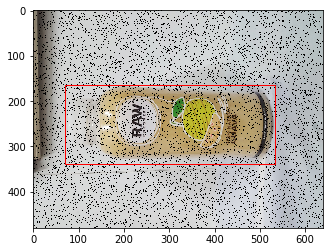

In [19]:
#im = np.array(Image.open('train_new_aug/' + name), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)
# Display the image
ax.imshow(image_aug)

# Create a Rectangle patch
rect = patches.Rectangle((final_coords[0],final_coords[1]),final_coords[2] - final_coords[0] ,final_coords[3] - final_coords[1],linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [22]:
train_aug_new_crop_rot_gauss.to_csv('train_aug_new_crop_rot_gauss.csv', index=False)

In [25]:
train_aug_new_crop_rot_gauss

,image_name,x1,y1,x2,y2
0,aug_new_rot_JPEG_20160517_140621_1000651031832...,137.000000,0,476.000000,366.000000
1,aug_new_crop_JPEG_20160517_140621_100065103183...,29.030928,0,514.639175,446.801153
2,aug_new_gauss_JPEG_20160517_140621_10006510318...,78.000000,83,446.000000,422.000000
3,aug_new_rot_1473231510890DeeplearnS11456.png,226.000000,0,431.000000,480.000000
4,aug_new_crop_1473231510890DeeplearnS11456.png,1.247563,79.1919,617.543860,410.505051
5,aug_new_gauss_1473231510890DeeplearnS11456.png,73.000000,146,567.000000,351.000000
6,aug_new_rot_1476881557883Untitled1.png,197.000000,0,435.000000,480.000000
7,aug_new_crop_1476881557883Untitled1.png,0.000000,115.34,640.000000,392.621359
8,aug_new_gauss_1476881557883Untitled1.png,13.000000,124,561.000000,362.000000
9,aug_new_rot_1474264827890cobalt-beyond-the-sea...,220.000000,0,410.000000,480.000000


In [30]:
from PIL import Image

In [31]:
import matplotlib.patches as patches

aug_new_crop_JPEG_20161123_181824_1000611096667.png


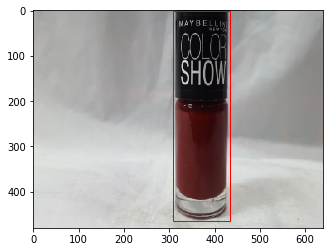

In [47]:
name = np.random.choice(os.listdir('train_new_aug_crop_rot_gauss/'))
im = np.array(Image.open('train_new_aug_crop_rot_gauss/' + name), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)
print(name)

pre = train_aug_new_crop_rot_gauss.loc[train_aug_new_crop_rot_gauss['image_name'] == name, ['x1','y1','x2','y2']].values
# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((pre[0][0],pre[0][1]),pre[0][2] - pre[0][0] ,pre[0][3] - pre[0][1],linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [57]:
check = pd.read_csv('submit_new_arch.csv')

In [72]:
check

,image_name,x1,y1,x2,y2
0,1467891670691DSC_0582.png,71.927704,84.168983,573.087585,428.725159
1,1475151786691DSC00560.png,222.006195,144.100204,448.157715,411.568726
2,1480334114405_R2A3620.png,179.458679,94.768372,429.994781,370.490814
3,JPEG_20160712_161047_1000606860114.png,218.655411,60.131523,526.353271,414.246063
4,JPEG_20160403_174522_-1137349501.png,122.633842,61.795990,528.162476,370.028778
5,1472901299234DSC_3812.png,52.371845,83.452339,584.204224,417.359253
6,JPEG_20160711_122349_1000194202357.png,207.811050,69.525787,444.419128,445.752808
7,1477045740188DSC_8170.png,15.279203,26.253105,638.855469,431.627838
8,14581995558443A.png,148.942032,131.476227,520.136414,405.795929
9,JPEG_20161116_182832_100030341860.png,55.235245,0.608547,510.221558,454.084686


In [74]:
x = pd.read_csv('test(1).csv')
x.columns

Index(['image_name', 'x1', 'x2', 'y1', 'y2'], dtype='object')